In [3]:
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
PROCESSED_DATA_DIR="../data/processed"

In [5]:
df=pd.read_parquet(f"{PROCESSED_DATA_DIR}/swing_trading_model_data.parquet")

5-Day Returns Summary:
count    1.301650e+06
mean     3.237714e-03
std      4.531755e-02
min     -6.811832e-01
25%     -1.794298e-02
50%      3.624139e-03
75%      2.462934e-02
max      1.182754e+00
Name: target_5d, dtype: float64


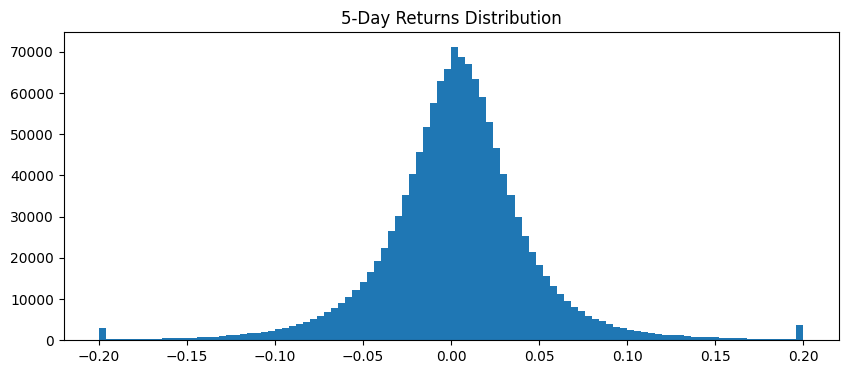

Stocks that go up in 5 days: 54.7%


In [5]:
# Quick target stats
print("5-Day Returns Summary:")
print(df['target_5d'].describe())

# Distribution plot
plt.figure(figsize=(10, 4))
plt.hist(df['target_5d'].clip(-0.2, 0.2), bins=100)  # Clip extremes
plt.title("5-Day Returns Distribution")
plt.show()

# Key question: What % of stocks go up vs down?
up_percentage = (df['target_5d'] > 0).mean()
print(f"Stocks that go up in 5 days: {up_percentage:.1%}")

In [6]:
# Just the correlation matrix
feature_columns=['return_5d', 'rsi_14d', 'volatility_10d', 'volatility_20d', 
                   'sp500_return_5d', 'relative_strength_5d',
                   "stochastic_k","stochastic_d",'ema_8_21_cross','ema_21d',
                   'ema_8d','macd_histogram']

correlations = df[['target_regression'] + feature_columns].corr()
print("Feature-Target Correlations:")
print(correlations['target_regression'].sort_values(ascending=False))

Feature-Target Correlations:
target_regression       1.000000
volatility_20d          0.045582
volatility_10d          0.038518
macd_histogram          0.002862
sp500_return_5d        -0.001436
ema_21d                -0.002507
ema_8d                 -0.002665
ema_8_21_cross         -0.014237
stochastic_k           -0.016752
stochastic_d           -0.017607
rsi_14d                -0.022942
relative_strength_5d   -0.027417
return_5d              -0.027465
Name: target_regression, dtype: float64


In [8]:
# Test the volatility signal manually
high_vol = df['volatility_20d'] > df['volatility_20d'].quantile(0.8)
low_vol = df['volatility_20d'] < df['volatility_20d'].quantile(0.2)

print("High volatility stocks avg return:", df[high_vol]['target_5d'].mean())
print("Low volatility stocks avg return:", df[low_vol]['target_5d'].mean())

High volatility stocks avg return: 0.006782621065797669
Low volatility stocks avg return: 0.0015862998024765147
